In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import torch
import numpy as np
import streamlit as st
animal_class = pd.read_csv("animals_data\class.csv") # this is the actual division
zoo = pd.read_csv("animals_data\zoo.csv") # data we should work on 


In [11]:
zoo.dtypes.values

array([dtype('O'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64')], dtype=object)

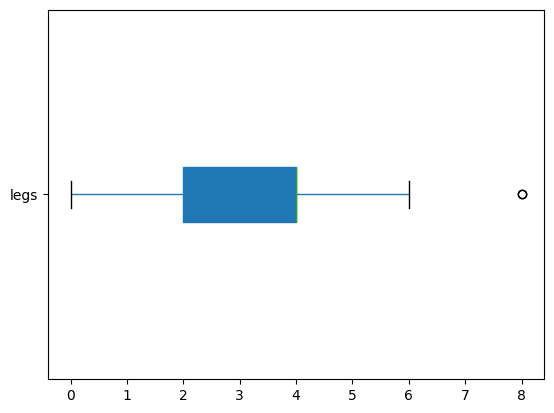

In [12]:

columns = zoo.columns 
""" columns are:
'animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type' """

plot = zoo.boxplot("legs", grid = False, vert = False, patch_artist = True )
plt.show()




In [13]:
def percentage(column_name):
    percent = int(zoo[column_name].sum()) / 101 
    return percent

percentage("feathers")

0.19801980198019803

In [14]:
type(len(zoo["feathers"]))

int

In [ ]:
columns = columns.drop(['animal_name','legs', 'class_type'])


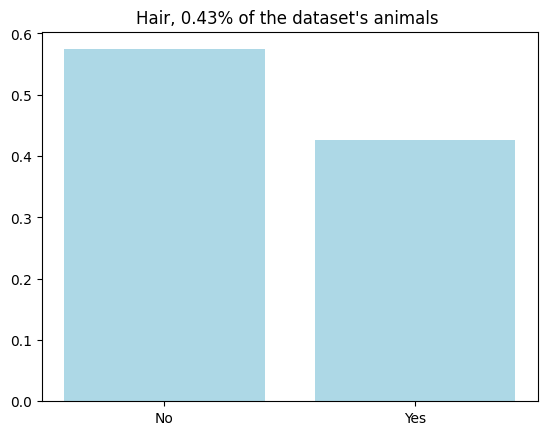

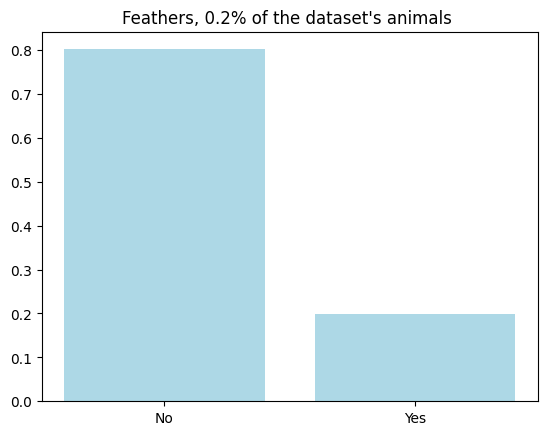

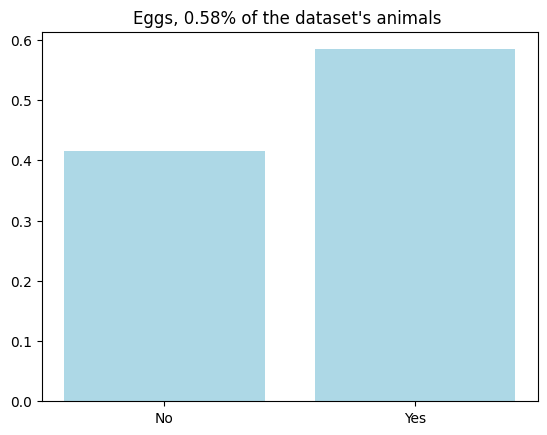

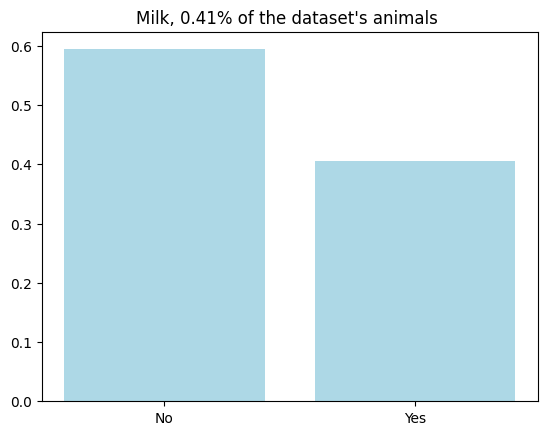

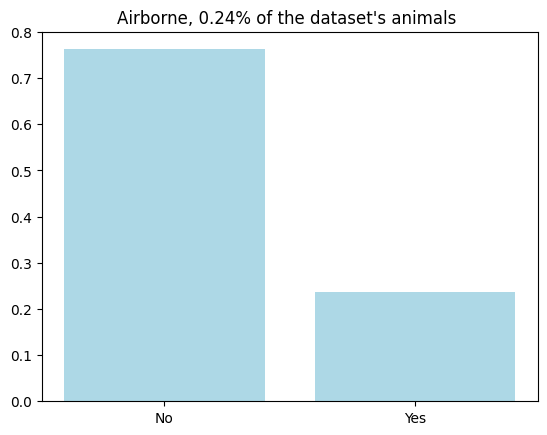

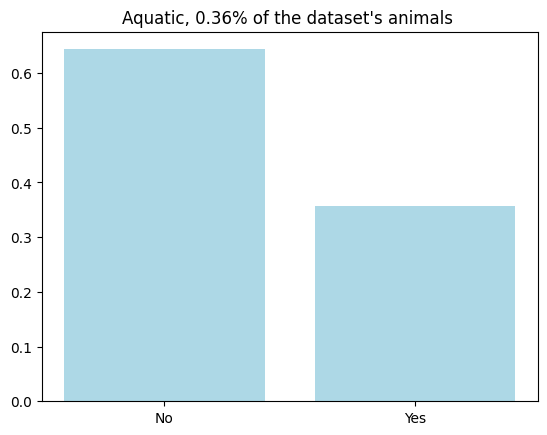

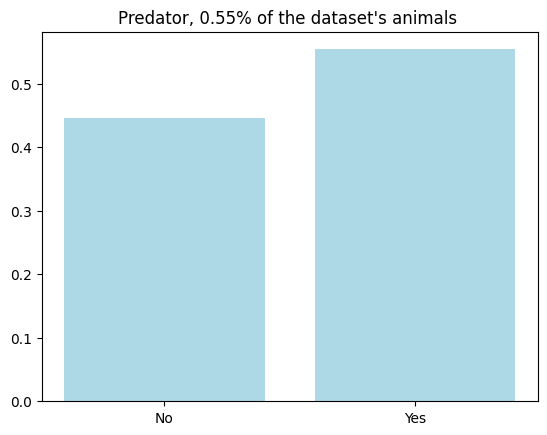

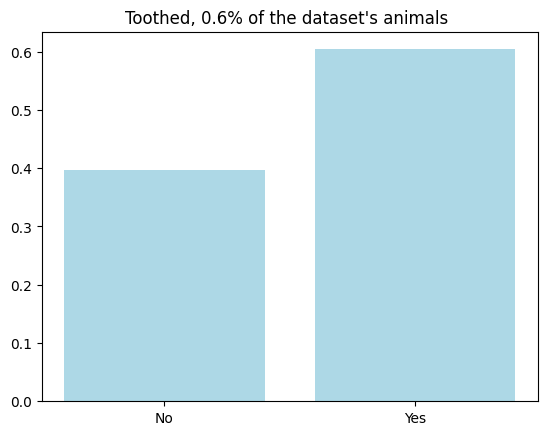

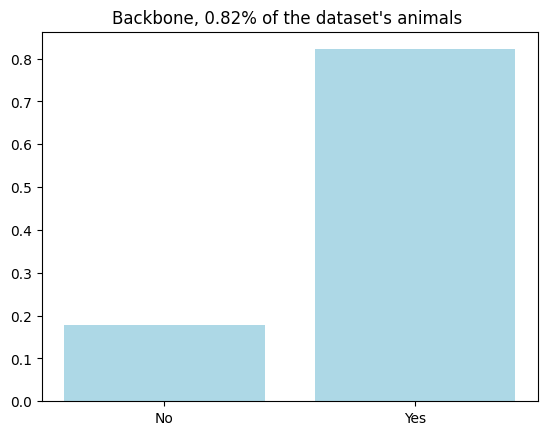

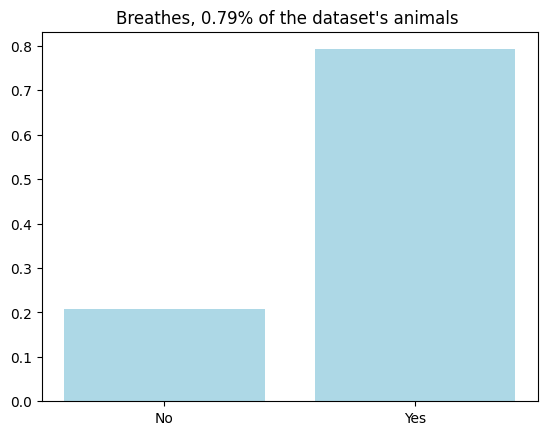

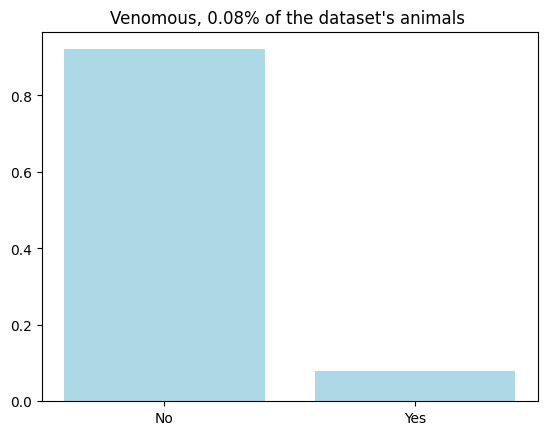

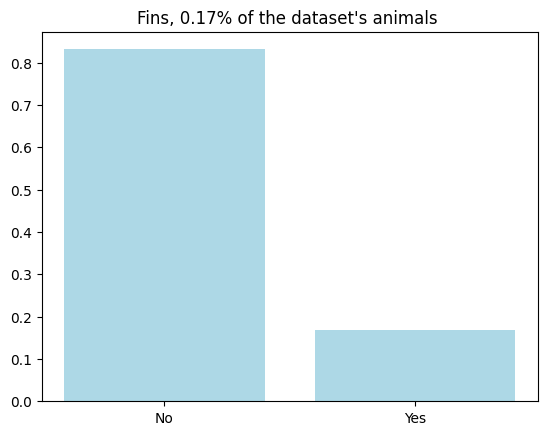

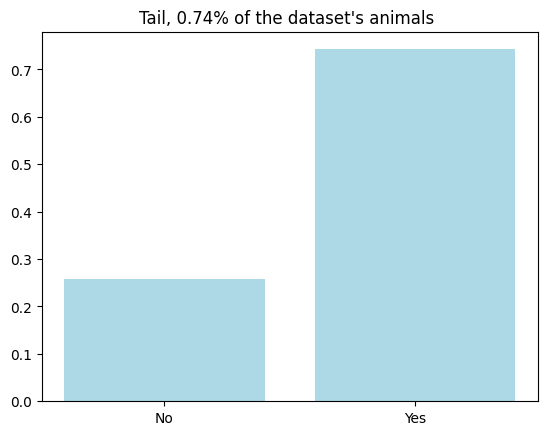

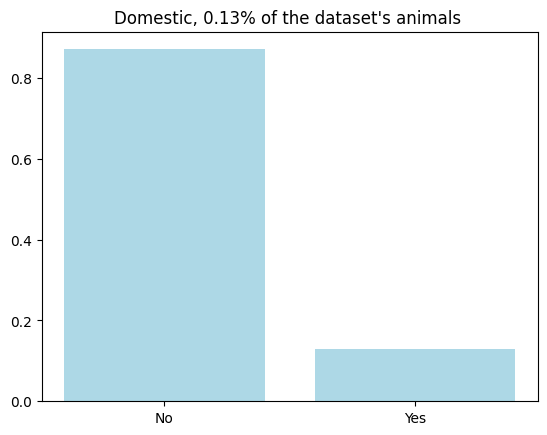

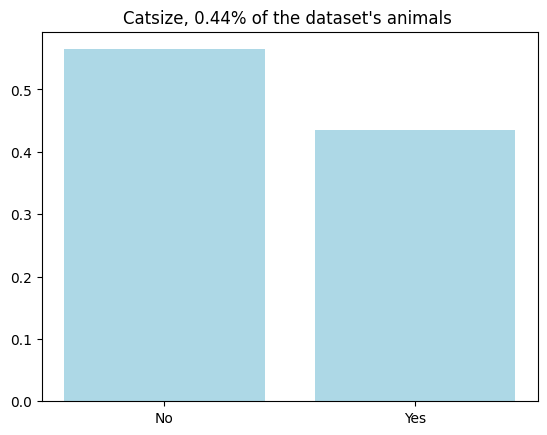

In [22]:
for element in columns:
    perc = percentage(element)
    plot = plt.bar(["No","Yes"],[1-perc, perc], color = 'lightblue' )
    plt.title(f"{element.capitalize()}, {round(perc, 2)}% of the dataset's animals ")
    plt.show()


Let's see in our dataset, how many catsize animals are domestic.

In [27]:
mask = zoo['catsize'] == True
zoo[mask].head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [28]:
zoo[~mask].head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
